---
## Step 0: Load The Data

In [11]:

# Load pickled data
import pickle
import tensorflow as tf

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']
x_train, y_train = train['features'], train['labels']  

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [12]:
# TODO: Number of training examples
n_train = len(x_train)

# TODO: Number of validation examples
n_validation = len(x_valid)

# TODO: Number of testing examples.
n_test = len(x_test)

# TODO: What's the shape of an traffic sign image?
image_shape = format(x_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
y_class = list(set(y_train))
n_classes = len(y_class)


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train,y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state =0 )
#x_test, x_validation, y_test,y_validation = train_test_split(x_test, y_test, test_size = 0.2, random_state =0 )

### Include an exploratory visualization of the dataset

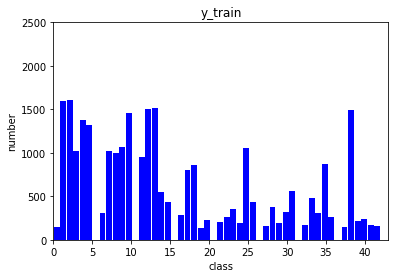

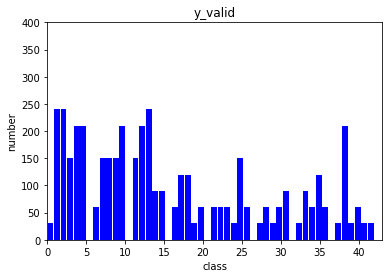

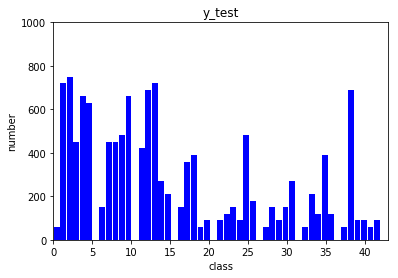

15


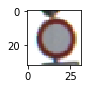

In [14]:
#visualize Data
import random
import numpy as np
import matplotlib.pyplot as plt
#%matplitlib inline

import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline


def draw_hist(myList,Title,Xlabel,Ylabel,Xmin,Xmax,Ymin,Ymax):
    plt.hist(myList,bins=50, histtype='bar',facecolor='blue',rwidth=0.9)
    plt.xlabel(Xlabel)
    plt.xlim(Xmin,Xmax)
    plt.ylabel(Ylabel)
    plt.ylim(Ymin,Ymax)
    plt.title(Title)
    plt.show()
  

draw_hist(y_train,'y_train','class','number',0,43,0.0,2500)
draw_hist(y_valid,'y_valid','class','number',0,43,0.0,400)
draw_hist(y_test,'y_test','class','number',0,43,0.0,1000)


index = random.randint(0, len(x_train))
image = x_train[index].squeeze()
print(y_train[index])
plt.figure(figsize=(1,1))
plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

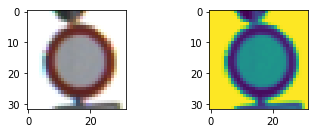

In [15]:
#preprocess data
from sklearn.utils import shuffle
from sklearn import preprocessing
from skimage import io,data,color
import cv2
#%matplitlib inline


#before grayscale
#plt.figure(figsize=(1,1))
plt.subplot(221) 
plt.imshow(image)


#after grayscale
image1 = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.subplot(222) 
plt.imshow(image1)

x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)
x_validation, y_validation = shuffle(x_validation, y_validation)


x_train_la = np.zeros([len(x_train), 32,32])
#x_test_la = np.zeros([len(x_test), 32,32])
x_validation_la = np.zeros([len(x_validation), 32,32])

#rgb to gray for each image
for i in range(len(x_train)):
    x_train_la[i] = cv2.cvtColor(x_train[i],cv2.COLOR_RGB2GRAY)

#for i in range(len(x_test)):
    #x_test_la[i] = cv2.cvtColor(x_test[i],cv2.COLOR_RGB2GRAY)

for i in range(len(x_validation)):
    x_validation_la[i]  = cv2.cvtColor(x_validation[i],cv2.COLOR_RGB2GRAY)

x_train = x_train_la.reshape(x_train_la.shape[0], 32, 32, 1).astype('float32')
#x_test = x_test_la.reshape(x_test_la.shape[0], 32, 32, 1).astype('float32')
x_validation = x_validation_la.reshape(x_validation_la.shape[0], 32, 32, 1).astype('float32')
    

# normalization
x_train = (x_train -128) /128
#x_test = (x_test-128) /128
x_validation = (x_validation-128) /128


### Model Architecture

In [17]:
from tensorflow.contrib.layers import flatten
keep_prob = tf.placeholder(tf.float32)

def LetNet(x):
    mu = 0
    sigma = 0.1
    x = tf.reshape(x, shape=[-1, 32, 32, 1])
    
    # soluation layer1 (C1):Convlutional input 32*32*1 output: 6*28*28 
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,1,6),  mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1  = tf.nn.conv2d(x, conv1_w, strides= (1,1,1,1), padding = 'VALID')+ conv1_b
    conv1 = tf.nn.relu(conv1)
    
    # soluation: pooling, input 6*28*28 output 6*14*14
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    #conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # soluation:layer2 (c3): input 6*28*28  convolutional Output = 10x10x16 
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16),  mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2  = tf.nn.conv2d(conv1, conv2_w, strides= (1,1,1,1),  padding = 'VALID')+ conv2_b
    conv2 = tf.nn.relu(conv2)
    
    # soluation (s4)pooling , input  = 10x10x16 output = 5x5x16     
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides = [1,2,2,1], padding = 'VALID'  )
    #conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # Fully connected layer , flatten, input = 5x5x16,output = 400  
    fc0  = flatten(conv2)   
    #Output = 120 input = 400
    fe1_w = tf.Variable(tf.truncated_normal(shape=(400,120),  mean = mu, stddev = sigma))
    fe1_b = tf.Variable(tf.zeros(120))
    fe1  = tf.matmul(fc0 , fe1_w) + fe1_b
    fe1 = tf.nn.relu(fe1)
    
    #dropout layer reduce overfitting
    fe1 = tf.nn.dropout(fe1,keep_prob)
                       
    # soluation:layer4: convolutional Output = 120 input = 84
    fe2_w = tf.Variable(tf.truncated_normal(shape=(120,84),  mean = mu, stddev = sigma))
    fe2_b = tf.Variable(tf.zeros(84))
    fe2  = tf.matmul(fe1 , fe2_w)+ fe2_b
    fe2 = tf.nn.relu(fe2)
    #fe2 = tf.nn.dropout(fe2,keep_prob)
                       
    # soluation:layer3: convolutional input = 84 input = 10
    fe3_w = tf.Variable(tf.truncated_normal(shape=(84,43),  mean = mu, stddev = sigma))
    fe3_b = tf.Variable(tf.zeros(43))
    logits  = tf.matmul(fe2 , fe3_w)+ fe3_b
    
    # soluation activation
    return logits

### Train, Validate and Test the Model

In [19]:
EPOCHS = 30
BATCH_SIZE = 125

# features and labels
x = tf.placeholder(tf.float32, (None, 32,32,1))
y = tf.placeholder(tf.int32, (None))                        
one_hot_y = tf.one_hot(y, 43)   

rate = 0.002
logits = LetNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y) 
loss_operation = tf.reduce_mean(cross_entropy)
optimizer  = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean (tf.cast(correct_prediction, tf.float32))

def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset: offset+ BATCH_SIZE], y_data[offset:offset+BATCH_SIZE] 
        accuracy = sess.run(accuracy_operation, feed_dict ={x: batch_x, y: batch_y, keep_prob : 1})
        total_accuracy +=  (accuracy * len(batch_x))
    return total_accuracy / num_examples


#train the model
def train_model(x_train, y_train, x_validation,y_validation ):
    saver=tf.train.Saver(max_to_keep=1)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        mun_examples = len(x_train)
        print('training .....')
        print()
        
        for i in range(EPOCHS):
            x_train, y_train = shuffle(x_train, y_train)
            for offset in range(0 , mun_examples,  BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = x_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob : 0.5})
              
            validation_accuracy = evaluate(x_validation, y_validation)
            print('EPOCH {}....', format(i+1))
            print('validation accuracy = ', format(validation_accuracy))
            print()
            if validation_accuracy>=0.99:
                #save_path =  saver.save(sess, './model.ckpt')
                break
        save_path =  saver.save(sess, './model.ckpt')
        print("model finish")
        print(save_path)
               
train_model(x_train,y_train,x_validation,y_validation)




training .....

EPOCH {}.... 1
validation accuracy =  0.8005747145534247

EPOCH {}.... 2
validation accuracy =  0.918965515091844

EPOCH {}.... 3
validation accuracy =  0.9466954003805401

EPOCH {}.... 4
validation accuracy =  0.9597701167409447

EPOCH {}.... 5
validation accuracy =  0.9673850597150024

EPOCH {}.... 6
validation accuracy =  0.9752873608350069

EPOCH {}.... 7
validation accuracy =  0.9775862099452951

EPOCH {}.... 8
validation accuracy =  0.9774425269115246

EPOCH {}.... 9
validation accuracy =  0.9827586264274586

EPOCH {}.... 10
validation accuracy =  0.9856321901168631

EPOCH {}.... 11
validation accuracy =  0.9862069007137726

EPOCH {}.... 12
validation accuracy =  0.9833333380948538

EPOCH {}.... 13
validation accuracy =  0.9831896575017908

EPOCH {}.... 14
validation accuracy =  0.9849137925039763

EPOCH {}.... 15
validation accuracy =  0.9873563251190487

EPOCH {}.... 16
validation accuracy =  0.9873563264892704

EPOCH {}.... 17
validation accuracy =  0.986206900

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

traffic sign type:  28
traffic sign type:  27
traffic sign type:  17
traffic sign type:  18
traffic sign type:  2


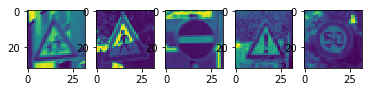

In [22]:
from PIL import Image
import os

IMAGE_HEIGHT = 32
IMAGE_WIDTH = 32
CHANNEL = 3

batch_size= 5
BATCH_SIZE = 5 


def get_name_and_image(i):
  all_image = os.listdir('./new_image/')
  name = os.path.basename('./new_image/'+all_image[i])
  image = cv2.imread('./new_image/' + all_image[i], 0) 
  return image, name

def get_next_batch(batch_size):
  new_image_x = np.zeros([batch_size, IMAGE_HEIGHT,IMAGE_WIDTH])
  new_image_y = np.zeros(43)

  for i in range(batch_size):
  
    image,name  = get_name_and_image(i)
    print("traffic sign type: ",name[:-10])
    new_image_x[i,:,:] = image
    new_image_y[i] = name[:-10]
   
  return new_image_x,new_image_y


new_image_x, new_image_y = get_next_batch(batch_size)

plt.subplot(151) 
plt.imshow(new_image_x[0])
plt.subplot(152) 
plt.imshow(new_image_x[1])
plt.subplot(153) 
plt.imshow(new_image_x[2])
plt.subplot(154) 
plt.imshow(new_image_x[3])
plt.subplot(155) 
plt.imshow(new_image_x[4])

#rgc to gray and normalized
new_image_x = new_image_x.reshape(new_image_x.shape[0], 32, 32, 1).astype('float32')
new_image_x = (new_image_x-128) /128


### Predict the Sign Type for Each Image

In [23]:
softmax_probability = tf.nn.softmax(logits)
prediction = tf.argmax(logits,1)

save_path = './model.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    mun_examples = len(new_image_x)
    #saver = saver.restore(sess, tf.train.latest_checkpoint('./'))
    saver.restore(sess, save_path)

    for offset in range(0 , mun_examples,  BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = new_image_x[offset:end], new_image_y[offset:end]
        pred = sess.run(prediction, feed_dict = {x: batch_x ,keep_prob: 1})
        probability = sess.run(softmax_probability, feed_dict = {x: batch_x, keep_prob : 1})
        
        #print('the sign name of image', batch_y[offset] )
        print('predict = ', pred)



INFO:tensorflow:Restoring parameters from ./model.ckpt
predict =  [28 11 17 18  2]


### Analyze Performance

In [24]:
with tf.Session() as sess:
    mun_examples = len(new_image_x)
    saver.restore(sess, save_path)

    for offset in range(0 , mun_examples,  BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = new_image_x[offset:end], new_image_y[offset:end]
        probability = sess.run(softmax_probability, feed_dict = {x: batch_x, keep_prob : 1})
        
        #print('probability = ',probability)

        print()
    print(sess.run(tf.nn.top_k(probability, 5)))
            


INFO:tensorflow:Restoring parameters from ./model.ckpt

TopKV2(values=array([[  1.00000000e+00,   2.04112009e-12,   2.13691606e-14,
          1.52693156e-14,   4.40851797e-17],
       [  5.59312880e-01,   2.89827794e-01,   1.45708308e-01,
          3.39680654e-03,   1.53115566e-03],
       [  1.00000000e+00,   1.24523587e-17,   5.10042709e-18,
          2.73205038e-19,   1.20333234e-19],
       [  9.97194648e-01,   2.36601732e-03,   2.02413619e-04,
          9.43740379e-05,   6.89559602e-05],
       [  9.99999642e-01,   3.63346857e-07,   2.83620627e-10,
          8.21896316e-13,   7.19699077e-15]], dtype=float32), indices=array([[28, 29, 20, 24, 18],
       [11,  1, 18, 37, 39],
       [17, 40, 14, 33, 38],
       [18, 26, 11, 33, 25],
       [ 2,  5,  3,  1,  7]], dtype=int32))
